# Data Pre-Processing

Data preprocessing adalah proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami.

Dalam kasus Assignment kali ini, data mentah yang akan diproses adalah data sales yang berjudul `Assignment.xlsx`

In [60]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
# mount ke Gdrive
drive.mount("/content/drive", force_remount=True)
folder_path = '/content/drive/My Drive/Assignment/'

#buka file
file_path = folder_path + 'Assignment.xlsx'
df = pd.read_excel(file_path)

#view file
print(df.head())

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


     brand   tanggal_pemesanan                       no_order   nama  \
0  HEYMALE 2023-10-27 00:00:03  MAL23102716015027861816603617  Tasya   
1  HEYMALE 2023-10-27 00:01:25  MAL23102718005496841802961580  Tasya   
2  HEYMALE 2023-10-27 00:15:36  MAL23102721172656072204170411  Mohay   
3  HEYMALE 2023-10-27 00:31:55    MAL231027326331541860705852  Purba   
4  HEYMALE 2023-10-27 00:31:55    MAL231027326331541860705852  Purba   

            email     hp  sku_produk kode_produk  \
0  tasy@gmail.com  89931  WPMOFA0201    WPMOFA02   
1  tasy@gmail.com  89931  WBMSFC0501    WBMSFC05   
2  moha@gmail.com  81988  WBMSFM0247    WBMSFM02   
3  just@gmail.com  81378  WBMSFC0502    WBMSFC05   
4  just@gmail.com  81378    MOHL0502      MOHL05   

                                   nama_produk        warna  ...   sumber  \
0  Ex Photoshoot Comfy Half Zip Pullover Black        Black  ...  WEBSITE   
1                Vichy Shirt Long Sleeve Brown        BROWN  ...  WEBSITE   
2          Vichy Shirt 

In [3]:
# memeriksa data null dari masing-masing kolom

print(df.shape)
df.isnull().sum()


(67609, 43)


brand                     0
tanggal_pemesanan         0
no_order                  0
nama                     27
email                 38444
hp                     1546
sku_produk                0
kode_produk               0
nama_produk               0
warna                     0
ukuran                    0
qty                       0
total_harga_barang        0
biaya_ongkir              0
promo_kode            67045
promo_value               0
total_bayar               0
status                    0
created_at                0
modified_at               0
scan                      0
invoice_number            0
no_resi_pickup        46314
tgl_bayar             46048
kode_tag                  0
name_tag                  0
kategori              16473
id_sales                  0
id_pelanggan          39464
no_resi               46314
tgl_request_pickup    46314
tgl_pickup             8791
warehouse                 0
sumber                    0
payment_note          28145
kasir               

In [4]:
print(f'Jumlah total data missing : {df.isnull().sum().sum()}')

Jumlah total data missing : 534212


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67609 entries, 0 to 67608
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   brand               67609 non-null  object        
 1   tanggal_pemesanan   67609 non-null  datetime64[ns]
 2   no_order            67609 non-null  object        
 3   nama                67582 non-null  object        
 4   email               29165 non-null  object        
 5   hp                  66063 non-null  object        
 6   sku_produk          67609 non-null  object        
 7   kode_produk         67609 non-null  object        
 8   nama_produk         67609 non-null  object        
 9   warna               67609 non-null  object        
 10  ukuran              67609 non-null  object        
 11  qty                 67609 non-null  int64         
 12  total_harga_barang  67609 non-null  int64         
 13  biaya_ongkir        67609 non-null  int64     

In [6]:
print('Total Data Duplikat', df.duplicated().sum())
df[df.duplicated()]

Total Data Duplikat 0


,brand,tanggal_pemesanan,no_order,nama,email,hp,sku_produk,kode_produk,nama_produk,warna,...,sumber,payment_note,kasir,crossbrand,website,channel,share_shipping_fee,share_payment_fee,product_anak,umur


# Handling Missing Value

Handle :
- Jika Data yang missing > 60%
menghapus kolom data tersebut
- Menghapus data yang unique banyak tetapi tidak terpakai
- **Data kategorik**
mengisi dengan kategori terbanyak
mengisi dengan `other` atau `lain-lain`
- **Data numerik**
mengisi dengan rata-rata atau median
mengisi dengan nilai `0`

## Drop data missing > 60%
Jika Data yang missing > 60%
menghapus kolom data tersebut

In [7]:
# drop data missing > 60%

threshold = 0.6
df = df.dropna(thresh = threshold*len(df), axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67609 entries, 0 to 67608
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   brand               67609 non-null  object        
 1   tanggal_pemesanan   67609 non-null  datetime64[ns]
 2   no_order            67609 non-null  object        
 3   nama                67582 non-null  object        
 4   hp                  66063 non-null  object        
 5   sku_produk          67609 non-null  object        
 6   kode_produk         67609 non-null  object        
 7   nama_produk         67609 non-null  object        
 8   warna               67609 non-null  object        
 9   ukuran              67609 non-null  object        
 10  qty                 67609 non-null  int64         
 11  total_harga_barang  67609 non-null  int64         
 12  biaya_ongkir        67609 non-null  int64         
 13  promo_value         67609 non-null  int64     

In [8]:
#cek kembali data kosong

df.isnull().sum()

brand                     0
tanggal_pemesanan         0
no_order                  0
nama                     27
hp                     1546
sku_produk                0
kode_produk               0
nama_produk               0
warna                     0
ukuran                    0
qty                       0
total_harga_barang        0
biaya_ongkir              0
promo_value               0
total_bayar               0
status                    0
created_at                0
modified_at               0
scan                      0
invoice_number            0
kode_tag                  0
name_tag                  0
kategori              16473
id_sales                  0
tgl_pickup             8791
warehouse                 0
sumber                    0
crossbrand                0
website                   0
channel                   0
product_anak              0
dtype: int64

## Input missing values

In [9]:
# Mengisi missing values pada kolom 'nama' dengan "Nama Belum Diketahui."
df['nama'] = df['nama'].fillna('Nama Belum Diketahui.')

# Mengisi missing values pada kolom 'hp' dengan nomor hp default "81389288325"
df['hp'] = df['hp'].fillna('81389288325')

#Menghapus kolom 'tgl_pickup'
df = df.drop(columns=['tgl_pickup'])

In [10]:
df.isnull().sum()

brand                     0
tanggal_pemesanan         0
no_order                  0
nama                      0
hp                        0
sku_produk                0
kode_produk               0
nama_produk               0
warna                     0
ukuran                    0
qty                       0
total_harga_barang        0
biaya_ongkir              0
promo_value               0
total_bayar               0
status                    0
created_at                0
modified_at               0
scan                      0
invoice_number            0
kode_tag                  0
name_tag                  0
kategori              16473
id_sales                  0
warehouse                 0
sumber                    0
crossbrand                0
website                   0
channel                   0
product_anak              0
dtype: int64

## Filling missing data in category

In [11]:
# Daftar kategori yang diinginkan
kategori_list = ['JACKETS', 'SHIRTS', 'BLAZERS', 'PANTS', 'BAGS', 'ACCESSORIES', 'POLO SHIRTS',
                 'EXCLUSIVE DEALS', 'SPORT SERIES', 'PERFUMES', 'SCARFS', 'TEES',
                 'HEYLOCAL X BOONABOO', 'T-SHIRTS', 'PARFUME', 'APPARELS', 'PRAYER SETS',
                 'HOODIES | SWEATSHIRTS', 'SHOES', 'DIAPER BAGS', 'NURSING APRONS', 'SUITS',
                 'KNITWEAR', 'MILK COOLER BAGS', 'ACCESORIES', 'T-SHIRT', 'PRAYER SET',
                 'SPECIAL BUNDLINGS', 'SCARF']

# Pemeriksaan sebelum pengisian kategori
kategori_sebelum = df[df['kategori'].isnull()][['nama_produk', 'kategori']]
print("Kategori Sebelum Pengisian:")
print(kategori_sebelum)

# Fungsi untuk mengisi nilai kategori yang kosong
def isi_kategori(row):
    if pd.isnull(row['kategori']):
        for kategori in kategori_list:
            if kategori.lower() in row['nama_produk'].lower():
                return kategori
        return 'OTHERS'
    else:
        return row['kategori']

# Terapkan fungsi ke dalam kolom 'kategori'
df['kategori'] = df.apply(isi_kategori, axis=1)

# Periksa apakah nilai kategori yang kosong atau baru telah terisi
kategori_setelah = df[df['kategori'].isin(['OTHERS', np.nan])][['nama_produk', 'kategori']]
print("\nKategori Setelah Pengisian:")
print(kategori_setelah)

# menghapus baris OTHERS
df = df[df['kategori'] != 'OTHERS']

Kategori Sebelum Pengisian:
                                     nama_produk kategori
3932                            Kami Scarf Motif      NaN
3933                        Kami Dress // Kaftan      NaN
3934                                  Kami Tunic      NaN
3977                                  Kami Tunic      NaN
3981   HEYLOCAL DEFECT TRAVEL PRAYER SET GRADE A      NaN
...                                          ...      ...
63286                       HEYLOCAL TEBUS MURAH      NaN
63290             RIAMIRANDA RM INNER TURTLENECK      NaN
63295                       HEYLOCAL TEBUS MURAH      NaN
63298        HEYLOCAL DEFECT PLAIN SCARF GRADE B      NaN
64705        HEYLOCAL DEFECT PLAIN SCARF GRADE B      NaN

[16473 rows x 2 columns]

Kategori Setelah Pengisian:
                          nama_produk kategori
3933             Kami Dress // Kaftan   OTHERS
3934                       Kami Tunic   OTHERS
3977                       Kami Tunic   OTHERS
3983                         Kami

In [14]:
df['kategori'].unique()

array(['JACKETS', 'SHIRTS', 'BLAZERS', 'PANTS', 'BAGS', 'ACCESSORIES',
       'POLO SHIRTS', 'EXCLUSIVE DEALS', 'SPORT SERIES', 'PERFUMES',
       'SCARFS', 'TEES', 'HEYLOCAL X BOONABOO', 'T-SHIRTS', 'PARFUME',
       'APPARELS', 'PRAYER SETS', 'HOODIES | SWEATSHIRTS', 'SHOES',
       'DIAPER BAGS', 'NURSING APRONS', 'SUITS', 'KNITWEAR',
       'MILK COOLER BAGS', 'ACCESORIES', 'SCARF', 'PRAYER SET', 'T-SHIRT',
       'SPECIAL BUNDLINGS'], dtype=object)

In [15]:
df.isnull().sum()

brand                 0
tanggal_pemesanan     0
no_order              0
nama                  0
hp                    0
sku_produk            0
kode_produk           0
nama_produk           0
warna                 0
ukuran                0
qty                   0
total_harga_barang    0
biaya_ongkir          0
promo_value           0
total_bayar           0
status                0
created_at            0
modified_at           0
scan                  0
invoice_number        0
kode_tag              0
name_tag              0
kategori              0
id_sales              0
warehouse             0
sumber                0
crossbrand            0
website               0
channel               0
product_anak          0
dtype: int64

In [16]:
#@title Dictionary untuk mapping kategori yang akan diubah
kategori_mapping = {
    'ACCESSORIES': 'ACCESORIES',
    'APPARELS': 'APPAREL',
    'BLAZERS': 'BLAZER',
    'DIAPER BAGS': 'DIAPER BAG',
    'EXCLUSIVE DEALS': 'EXCLUSIVE DEAL',
    'HEYLOCAL X BOONABOO': 'HEYLOCAL X BOONABOO',
    'HOODIES | SWEATSHIRTS': 'HOODIE | SWEATSHIRT',
    'JACKETS': 'JACKET',
    'KNITWEAR': 'KNITWEAR',
    'MILK COOLER BAGS': 'MILK COOLER BAG',
    'NURSING APRONS': 'NURSING APRON',
    'PANTS': 'PANT',
    'PARFUME': 'PARFUME',
    'PERFUMES': 'PARFUME',
    'POLO SHIRTS': 'POLO SHIRT',
    'PRAYER SET': 'PRAYER SET',
    'PRAYER SETS': 'PRAYER SET',
    'SCARF': 'SCARF',
    'SCARFS': 'SCARF',
    'SHIRTS': 'SHIRT',
    'SHOES': 'SHOE',
    'SPECIAL BUNDLINGS': 'SPECIAL BUNDLINGS',
    'SPORT SERIES': 'SPORT SERIES',
    'SUITS': 'SUIT',
    'T-SHIRT': 'T-SHIRT',
    'T-SHIRTS': 'T-SHIRT',
    'TEES': 'T-SHIRT',
    'BAGS': 'BAG',
    'ACCESORIES': 'ACCESORIES'
}

# Mengganti nilai kategori menggunakan mapping
df['kategori'] = df['kategori'].map(kategori_mapping)

# Menampilkan unique kategori setelah perubahan
print(df['kategori'].unique())

['JACKET' 'SHIRT' 'BLAZER' 'PANT' 'BAG' 'ACCESORIES' 'POLO SHIRT'
 'EXCLUSIVE DEAL' 'SPORT SERIES' 'PARFUME' 'SCARF' 'T-SHIRT'
 'HEYLOCAL X BOONABOO' 'APPAREL' 'PRAYER SET' 'HOODIE | SWEATSHIRT' 'SHOE'
 'DIAPER BAG' 'NURSING APRON' 'SUIT' 'KNITWEAR' 'MILK COOLER BAG'
 'SPECIAL BUNDLINGS']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63176 entries, 0 to 67608
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   brand               63176 non-null  object        
 1   tanggal_pemesanan   63176 non-null  datetime64[ns]
 2   no_order            63176 non-null  object        
 3   nama                63176 non-null  object        
 4   hp                  63176 non-null  object        
 5   sku_produk          63176 non-null  object        
 6   kode_produk         63176 non-null  object        
 7   nama_produk         63176 non-null  object        
 8   warna               63176 non-null  object        
 9   ukuran              63176 non-null  object        
 10  qty                 63176 non-null  int64         
 11  total_harga_barang  63176 non-null  int64         
 12  biaya_ongkir        63176 non-null  int64         
 13  promo_value         63176 non-null  int64     

# Assignment Task
Berikut rincian untuk menyelesaikan assignment task dengan rincian sebagai berikut :

1. Pisahkan kolom tanggal pemesanan menjadi dua kolom:
- Kolom 1 (DD/MM/YYYY)
- Kolom 2 (hh:mm).

2. Tentukan 3 produk teratas dengan penjualan tertinggi dan buat visualisasi menggunakan diagram batang.

3. Berikan total dan persentase order berhasil versus order yang tercancel, visualisasikan menggunakan diagram pie.

4. Identifikasi 3 kategori teratas dengan penjualan tertinggi dan 3 kategori terbawah dengan penjualan terendah. Berikan juga visualisasinya.

5. Buat visualisasi untuk merepresentasikan distribusi setiap pembeli.

## Pisahkan kolom tanggal pemesanan menjadi dua kolom:

In [62]:
# Menentukan format tanggal
date_format = "%d/%m/%Y %H:%M"

# Mengonversi kolom tanggal_pemesanan ke tipe data datetime
df['tanggal_pemesanan'] = pd.to_datetime(df['tanggal_pemesanan'], format=date_format, errors='coerce')

# Membuat dua kolom baru
df['tanggal'] = df['tanggal_pemesanan'].dt.strftime('%d/%m/%Y')
df['jam'] = df['tanggal_pemesanan'].dt.strftime('%H:%M')

df.info()
print(df[['tanggal', 'jam']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67609 entries, 0 to 67608
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   brand               67609 non-null  object        
 1   tanggal_pemesanan   67609 non-null  datetime64[ns]
 2   no_order            67609 non-null  object        
 3   nama                67582 non-null  object        
 4   email               29165 non-null  object        
 5   hp                  66063 non-null  object        
 6   sku_produk          67609 non-null  object        
 7   kode_produk         67609 non-null  object        
 8   nama_produk         67609 non-null  object        
 9   warna               67609 non-null  object        
 10  ukuran              67609 non-null  object        
 11  qty                 67609 non-null  int64         
 12  total_harga_barang  67609 non-null  int64         
 13  biaya_ongkir        67609 non-null  int64     

## Tentukan 3 produk teratas dengan penjualan tertinggi dan buat visualisasi menggunakan diagram batang.

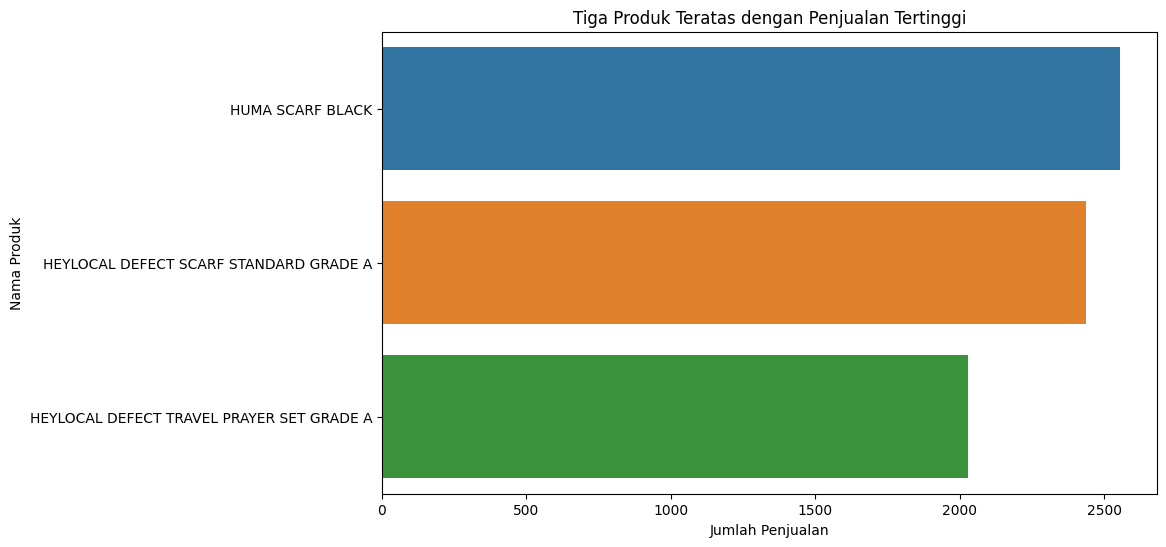

In [63]:

# Menghitung total penjualan per-produk
top_products = df.groupby('nama_produk')['qty'].sum().nlargest(3)

# Membuat visualisasi menggunakan diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Tiga Produk Teratas dengan Penjualan Tertinggi')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Nama Produk')
plt.show()


## Berikan total dan persentase order berhasil versus order yang tercancel, visualisasikan menggunakan diagram pie.

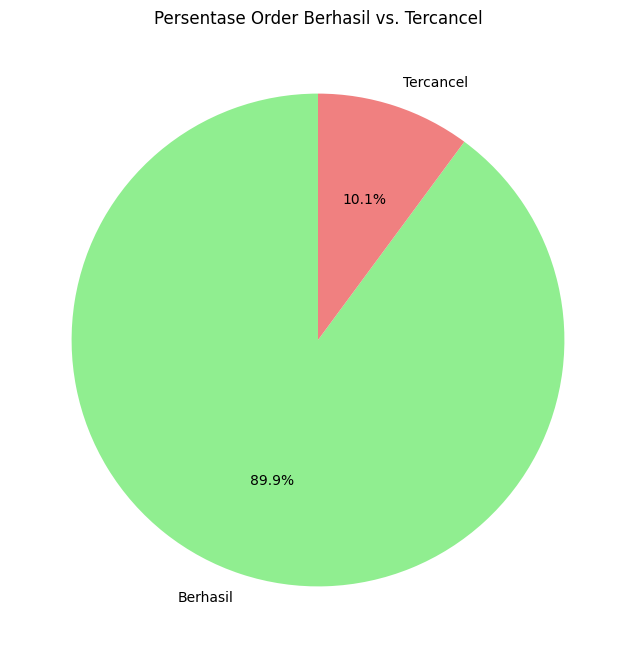

In [64]:
#@title Kasus jika hanya Order Berhasil dan Order Tercancel
# Menghitung total order berhasil dan tercancel
total_orders = df['status'].count()
successful_orders = df[df['status'] == 'Order Berhasil']['status'].count()
cancelled_orders = df[df['status'] == 'Order Tercancel']['status'].count()

# Membuat visualisasi menggunakan diagram pie
labels = ['Berhasil', 'Tercancel']
sizes = [successful_orders, cancelled_orders]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Order Berhasil vs. Tercancel')
plt.show()


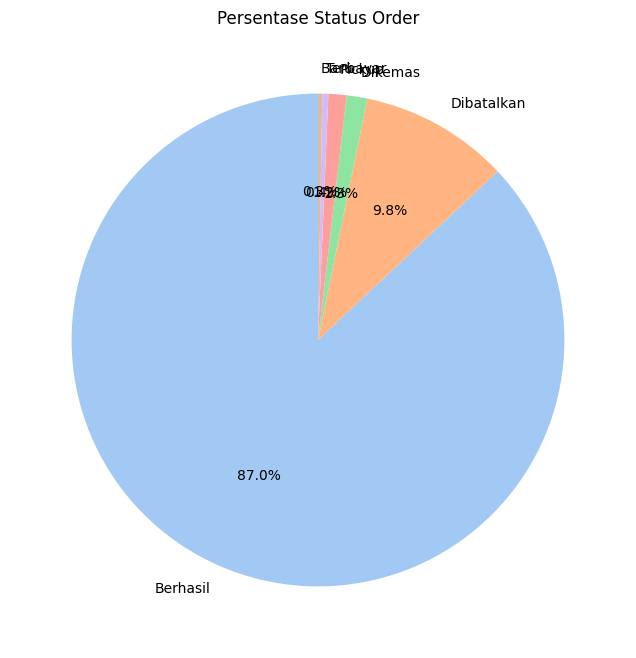

In [65]:
#@title Kasus jika semua status digunakan
# Mengganti kategori 'status' dengan angka
df['status'] = df['status'].replace({
    'Order Berhasil': 'Berhasil',
    'Order Tercancel': 'Dibatalkan',
    'Order Baru': 'Baru',
    'Order Dikemas': 'Dikemas',
    'Order Pickup': 'Pickup',
    'Order Terbayar': 'Terbayar'
})

# Menghitung total order
total_orders = df['status'].count()

# Menghitung jumlah order per status
order_counts = df['status'].value_counts()

# Membuat visualisasi menggunakan diagram pie
labels = order_counts.index
sizes = order_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Status Order')
plt.show()

## Identifikasi 3 kategori teratas dengan penjualan tertinggi dan 3 kategori terbawah dengan penjualan terendah. Berikan juga visualisasinya.

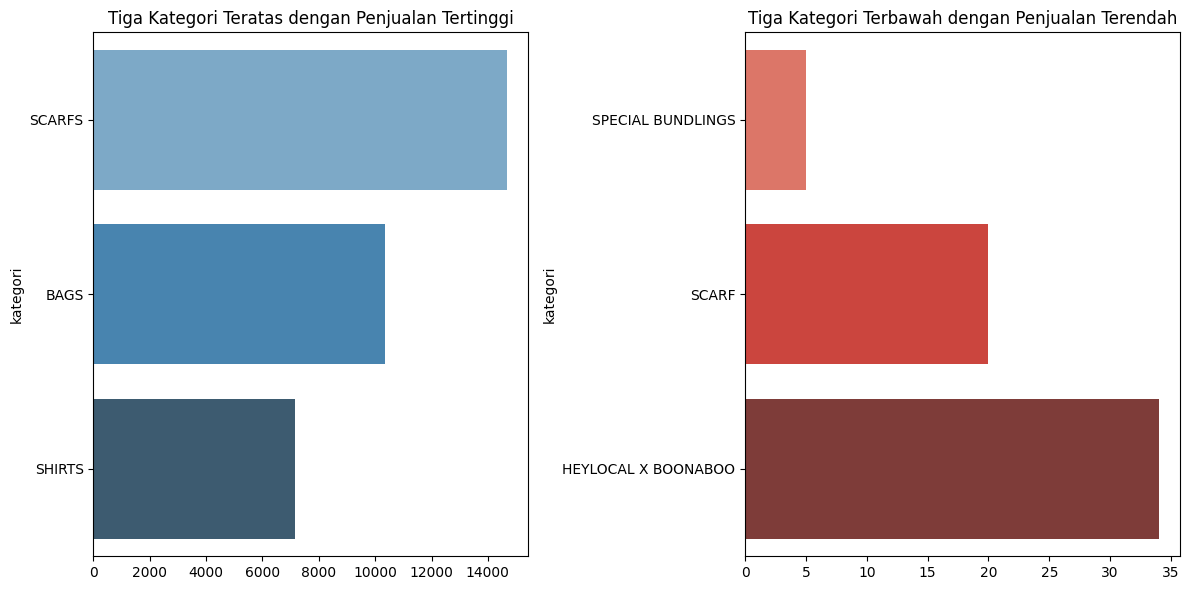

In [66]:
# Menghitung total penjualan per kategori
kategori_atas = df.groupby('kategori')['qty'].sum().nlargest(3)
kategori_bawah = df.groupby('kategori')['qty'].sum().nsmallest(3)

# Membuat visualisasi menggunakan diagram batang
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=kategori_atas.values, y=kategori_atas.index, palette='Blues_d')
plt.title('Tiga Kategori Teratas dengan Penjualan Tertinggi')

plt.subplot(1, 2, 2)
sns.barplot(x=kategori_bawah.values, y=kategori_bawah.index, palette='Reds_d')
plt.title('Tiga Kategori Terbawah dengan Penjualan Terendah')

plt.tight_layout()
plt.show()


## Buat visualisasi untuk merepresentasikan distribusi usia

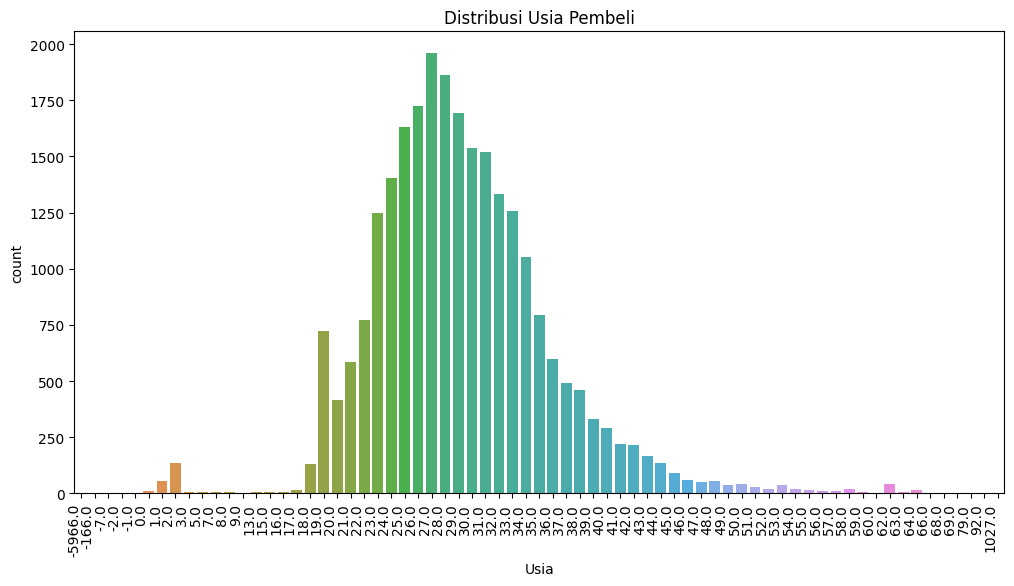

In [93]:
df_cleaned = df.dropna(subset=['umur'])

plt.figure(figsize=(12, 6))
sns.countplot(x='umur', data=df_cleaned)
plt.title('Distribusi Usia Pembeli')
plt.xlabel('Usia')
plt.xticks(rotation=90, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


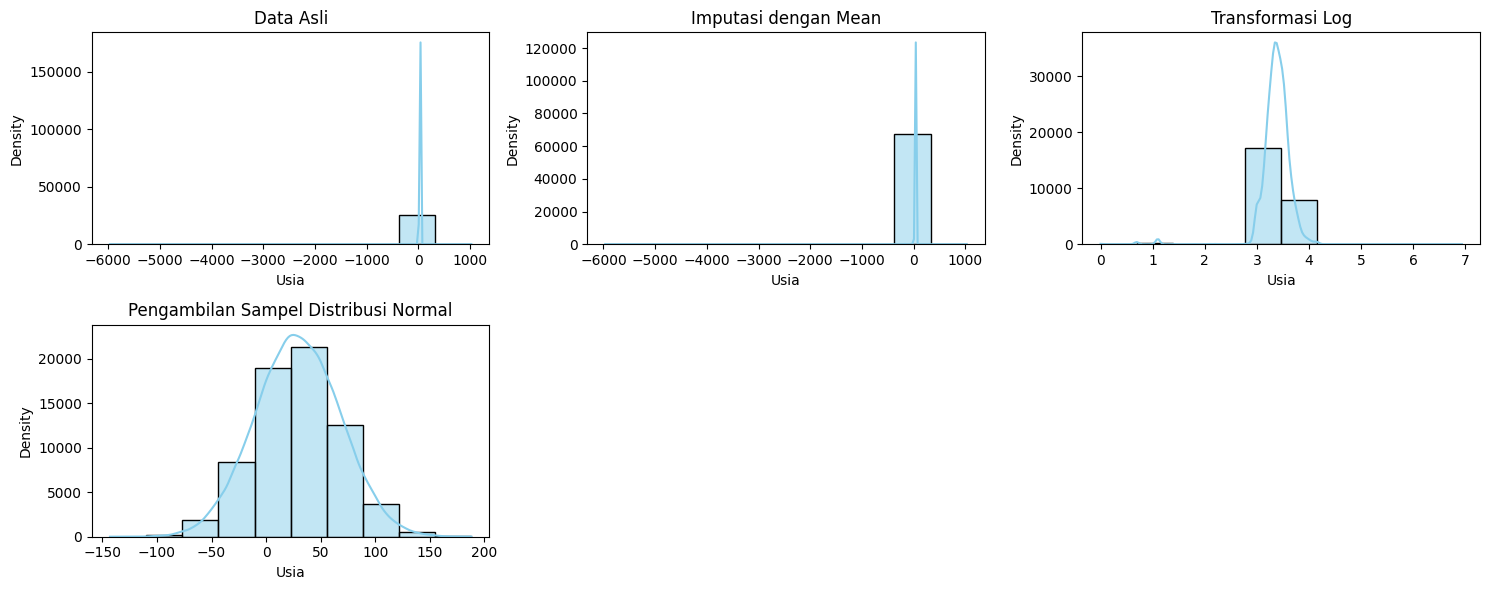

In [72]:
from scipy.stats import norm

# Imputasi Nilai yang Hilang dengan Mean
df['umur_mean_imputed'] = df['umur'].fillna(df['umur'].mean())

# Transformasi Data (Log-transformasi)
df['umur_log_transformed'] = np.log1p(df['umur'])

# Pengambilan Sampel dari Distribusi Normal
mean_usia = df['umur'].mean()
std_usia = df['umur'].std()
sampled_data = np.random.normal(mean_usia, std_usia, len(df['umur']))

# Membuat visualisasi untuk membandingkan hasil
plt.figure(figsize=(15, 6))

# Histogram Data Asli
plt.subplot(2, 3, 1)
sns.histplot(df['umur'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Data Asli')
plt.xlabel('Usia')
plt.ylabel('Density')

# Histogram Imputasi Mean
plt.subplot(2, 3, 2)
sns.histplot(df['umur_mean_imputed'], bins=10, kde=True, color='skyblue')
plt.title('Imputasi dengan Mean')
plt.xlabel('Usia')
plt.ylabel('Density')

# Histogram Transformasi Log
plt.subplot(2, 3, 3)
sns.histplot(df['umur_log_transformed'], bins=10, kde=True, color='skyblue')
plt.title('Transformasi Log')
plt.xlabel('Usia')
plt.ylabel('Density')

# Histogram Pengambilan Sampel Distribusi Normal
plt.subplot(2, 3, 4)
sns.histplot(sampled_data, bins=10, kde=True, color='skyblue')
plt.title('Pengambilan Sampel Distribusi Normal')
plt.xlabel('Usia')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Analisis Data
Dalam analisis data, akan dilakukan beberapa analisis seperti Analisis kategori, tren penjualan, segmentasi pelanggan, analisis biaya, dan lain-lain.

In [18]:
#@title Analisis Statistik Deskriptif
df['promo_value']= df['promo_value'].abs()
statistik_deskriptif = df.describe()
print(statistik_deskriptif)

                qty  total_harga_barang   biaya_ongkir   promo_value  \
count  63176.000000        6.317600e+04   63176.000000  6.317600e+04   
mean       1.408082        2.352145e+05   11886.911169  5.128961e+04   
std        1.626756        2.674131e+05   21410.292798  3.371007e+05   
min        1.000000        0.000000e+00       0.000000  0.000000e+00   
25%        1.000000        1.250000e+05       0.000000  0.000000e+00   
50%        1.000000        1.890000e+05       0.000000  0.000000e+00   
75%        1.000000        2.890000e+05   13500.000000  2.000000e+04   
max      145.000000        2.030000e+07  317500.000000  2.257500e+07   

        total_bayar  
count  6.317600e+04  
mean   1.280708e+06  
std    1.991173e+06  
min    0.000000e+00  
25%    3.135000e+05  
50%    5.402500e+05  
75%    1.382000e+06  
max    4.464000e+07  


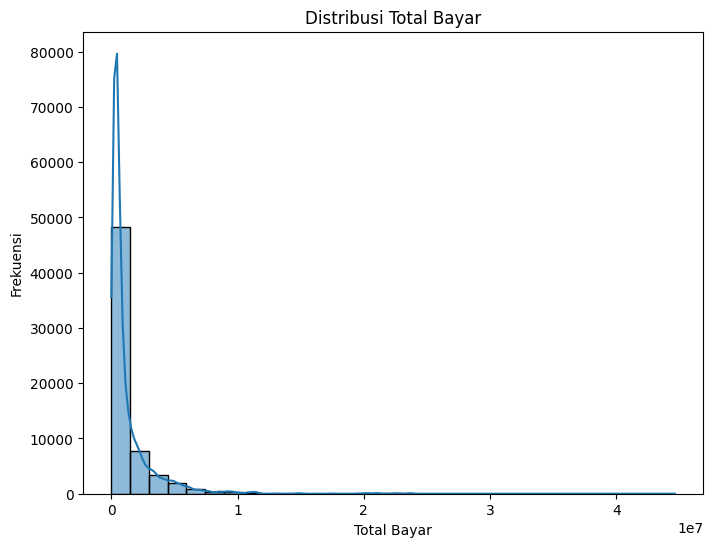

In [19]:
#@title Visualisasi Data Distribusi Total Bayar
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bayar'], bins=30, kde=True)
plt.title('Distribusi Total Bayar')
plt.xlabel('Total Bayar')
plt.ylabel('Frekuensi')
plt.show()

In [20]:
#@title Analisis Kategori
proporsi_kategori = df['kategori'].value_counts(normalize=True)
print(proporsi_kategori)

SCARF                  0.190420
EXCLUSIVE DEAL         0.153666
BAG                    0.146005
SHIRT                  0.106718
PARFUME                0.068238
APPAREL                0.053011
PANT                   0.051808
PRAYER SET             0.047914
POLO SHIRT             0.044558
JACKET                 0.031563
T-SHIRT                0.029996
HOODIE | SWEATSHIRT    0.019786
ACCESORIES             0.019612
BLAZER                 0.010700
KNITWEAR               0.007218
NURSING APRON          0.004606
SHOE                   0.004448
MILK COOLER BAG        0.004353
SPORT SERIES           0.001884
DIAPER BAG             0.001804
SUIT                   0.001108
HEYLOCAL X BOONABOO    0.000507
SPECIAL BUNDLINGS      0.000079
Name: kategori, dtype: float64


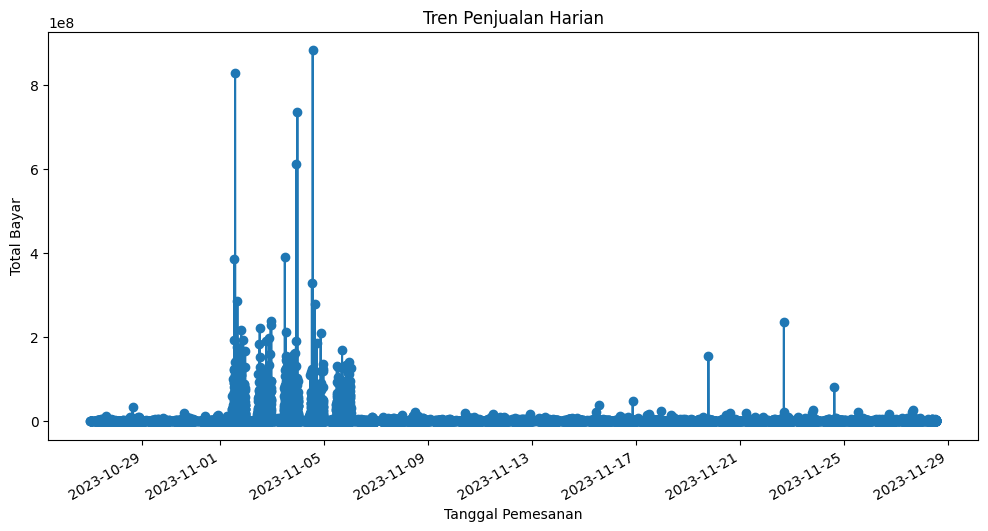

In [21]:
#@title Analisis Waktu (Tren penjualan)
# Tren penjualan harian
tren_harian = df.groupby('tanggal_pemesanan')['total_bayar'].sum()
plt.figure(figsize=(12, 6))
tren_harian.plot(marker='o')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal Pemesanan')
plt.ylabel('Total Bayar')
plt.show()

In [22]:
#@title Segmentasi Pelanggan
# Segmentasi pelanggan berdasarkan jumlah pembelian
segmentasi_pelanggan = pd.cut(df['qty'], bins=[0, 1, 2, 5, np.inf], labels=['1 item', '2 items', '3-5 items', '6+ items'])
df['segmentasi_pelanggan'] = segmentasi_pelanggan
jumlah_segmentasi = df['segmentasi_pelanggan'].value_counts()
print(jumlah_segmentasi)

1 item       52074
2 items       6158
3-5 items     3796
6+ items      1148
Name: segmentasi_pelanggan, dtype: int64


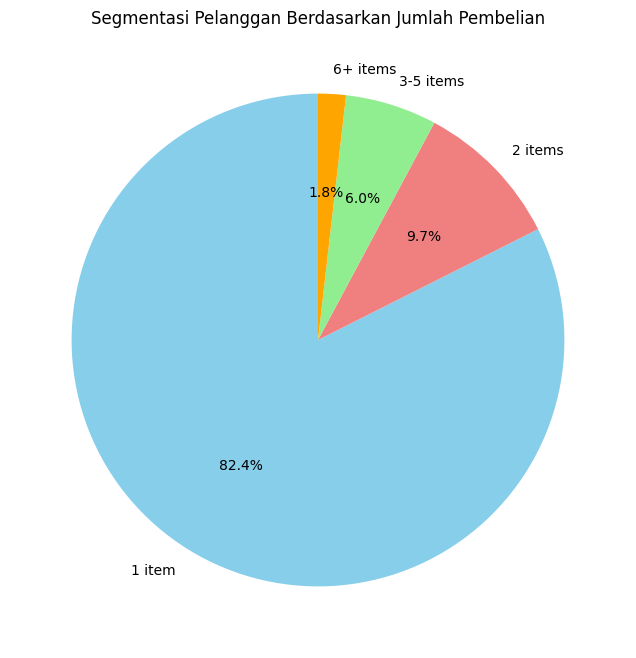

In [41]:
# Visualisasi segmen pelanggan berdasarkan jumlah pembelian
plt.figure(figsize=(8, 8))
plt.pie(jumlah_segmentasi, labels=jumlah_segmentasi.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Segmentasi Pelanggan Berdasarkan Jumlah Pembelian')
plt.show()

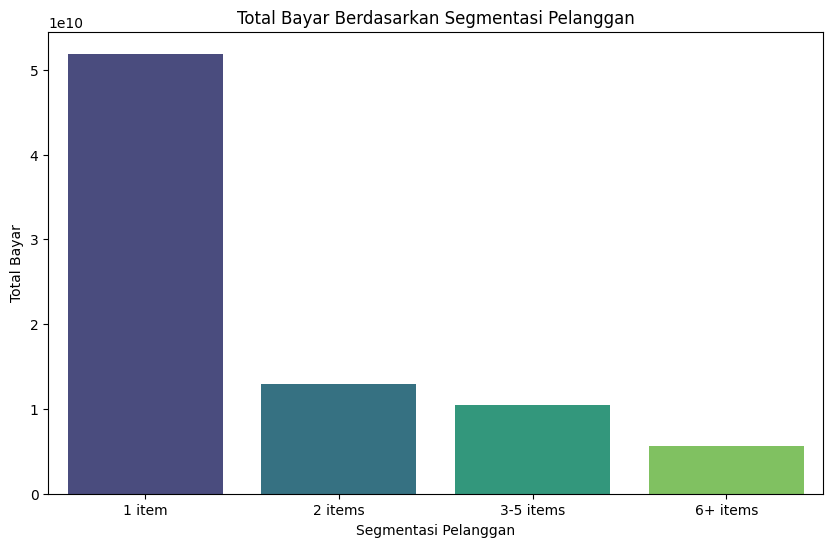

In [48]:
# Segmentasi pelanggan
segmentasi_pelanggan = pd.cut(df['qty'], bins=[0, 1, 2, 5, np.inf], labels=['1 item', '2 items', '3-5 items', '6+ items'])
df['segmentasi_pelanggan'] = segmentasi_pelanggan

# Hitung total bayar untuk setiap segmentasi pelanggan
total_bayar_per_segmentasi = df.groupby('segmentasi_pelanggan')['total_bayar'].sum().reset_index()

# Visualisasi total bayar berdasarkan segmentasi pelanggan
plt.figure(figsize=(10, 6))
sns.barplot(x='segmentasi_pelanggan', y='total_bayar', data=total_bayar_per_segmentasi, palette='viridis')
plt.title('Total Bayar Berdasarkan Segmentasi Pelanggan')
plt.xlabel('Segmentasi Pelanggan')
plt.ylabel('Total Bayar')
plt.show()

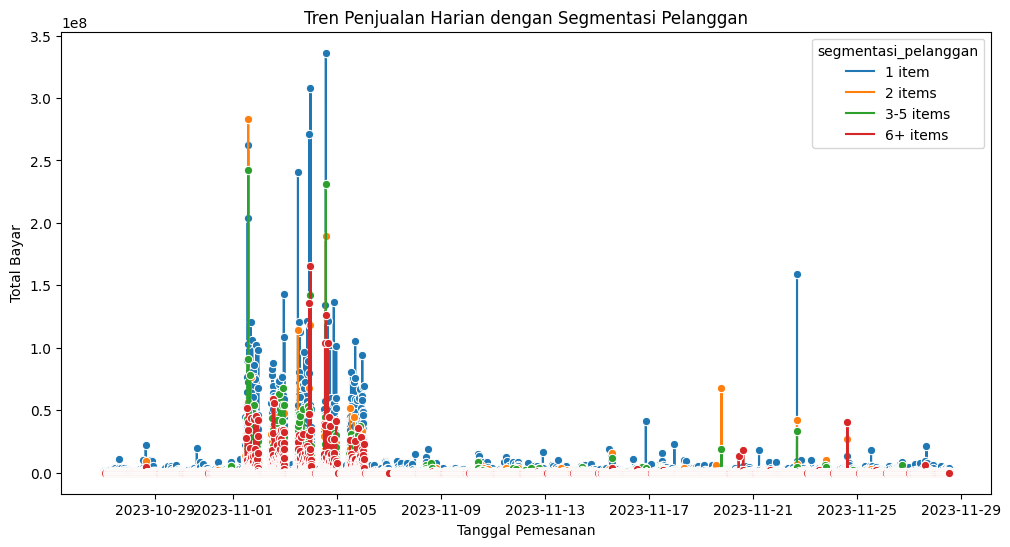

In [47]:
# Segmentasi pelanggan
segmentasi_pelanggan = pd.cut(df['qty'], bins=[0, 1, 2, 5, np.inf], labels=['1 item', '2 items', '3-5 items', '6+ items'])
df['segmentasi_pelanggan'] = segmentasi_pelanggan

# Tren penjualan harian
tren_harian = df.groupby(['tanggal_pemesanan', 'segmentasi_pelanggan'])['total_bayar'].sum().reset_index()

# Visualisasi tren harian dengan warna berdasarkan segmentasi pelanggan
plt.figure(figsize=(12, 6))
sns.lineplot(x='tanggal_pemesanan', y='total_bayar', hue='segmentasi_pelanggan', data=tren_harian, marker='o')
plt.title('Tren Penjualan Harian dengan Segmentasi Pelanggan')
plt.xlabel('Tanggal Pemesanan')
plt.ylabel('Total Bayar')
plt.show()

In [23]:
print(len(df['kategori'].unique()))

23


In [24]:
#@title Analisis Biaya
# Analisis biaya pengiriman
analisis_biaya = df.groupby('kategori')['biaya_ongkir'].mean()
print(analisis_biaya)


kategori
ACCESORIES              6176.755448
APPAREL                10438.190505
BAG                    17621.747615
BLAZER                 21221.153846
DIAPER BAG             10013.157895
EXCLUSIVE DEAL           564.688916
HEYLOCAL X BOONABOO    29890.625000
HOODIE | SWEATSHIRT     8564.400000
JACKET                  6209.127382
KNITWEAR               27615.131579
MILK COOLER BAG         3420.000000
NURSING APRON           3441.580756
PANT                    9426.978307
PARFUME                16527.371839
POLO SHIRT             22751.509769
PRAYER SET             16706.309878
SCARF                  14577.805486
SHIRT                  11136.013053
SHOE                    3007.117438
SPECIAL BUNDLINGS          0.000000
SPORT SERIES           10277.310924
SUIT                   13185.714286
T-SHIRT                 8499.736148
Name: biaya_ongkir, dtype: float64


In [25]:
#@title Analisis Performa Produk
produk_tertinggi = df.sort_values(by='total_harga_barang', ascending=False).head(10)
print(produk_tertinggi[['nama_produk', 'total_harga_barang']])

                                     nama_produk  total_harga_barang
3932                            Kami Scarf Motif            20300000
3981   HEYLOCAL DEFECT TRAVEL PRAYER SET GRADE A             8608000
4003   HEYLOCAL DEFECT TRAVEL PRAYER SET GRADE A             8070000
4006   HEYLOCAL DEFECT TRAVEL PRAYER SET GRADE A             8070000
4048   HEYLOCAL DEFECT TRAVEL PRAYER SET GRADE A             7801000
60290                 PO HUMA SCARF NO BOX BLACK             6765000
64048                         Archie Bomber Navy             5727000
4050   HEYLOCAL DEFECT TRAVEL PRAYER SET GRADE A             5649000
4053    HEYLOCAL LANA PRAYER SET EXCLUSIVE DEALS             5382000
42231     HEYLOCAL DEFECT SCARF STANDARD GRADE A             5247000


## Box Plot

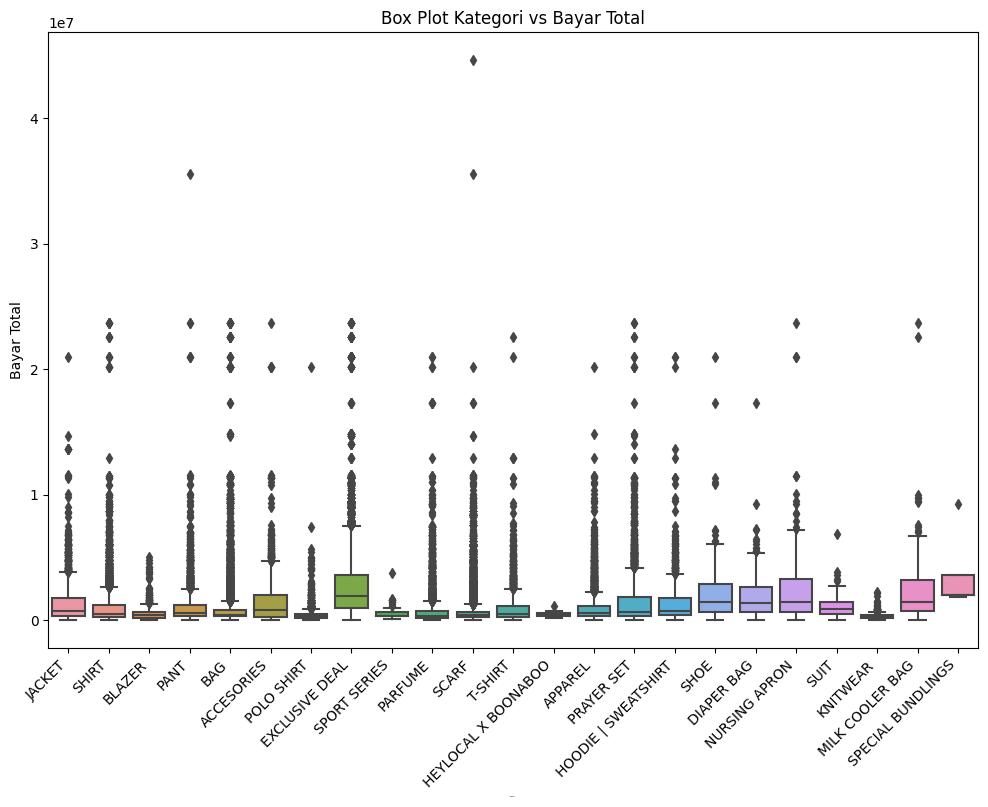

In [45]:
#@title Box Plot Kategori vs Bayar Total

plt.figure(figsize=(12, 8))
sns.boxplot(x='kategori', y='total_bayar', data=df)
plt.title('Box Plot Kategori vs Bayar Total')
plt.xlabel('Kategori',size = 1)
plt.ylabel('Bayar Total')
plt.xticks(rotation=45, ha='right')
plt.show()

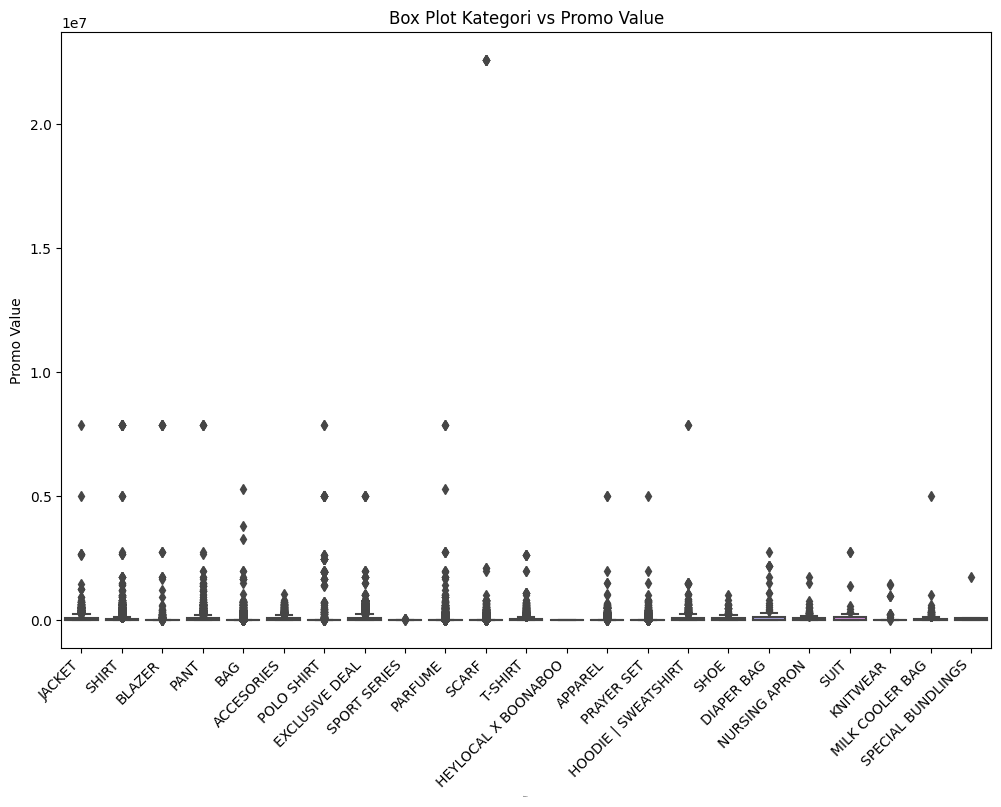

In [46]:
#@title Box Plot Kategori vs Promo Value
plt.figure(figsize=(12, 8))
sns.boxplot(x='kategori', y='promo_value', data=df)
plt.title('Box Plot Kategori vs Promo Value')
plt.xlabel('Kategori',size = 1)
plt.ylabel('Promo Value')
plt.xticks(rotation=45, ha='right')
plt.show()

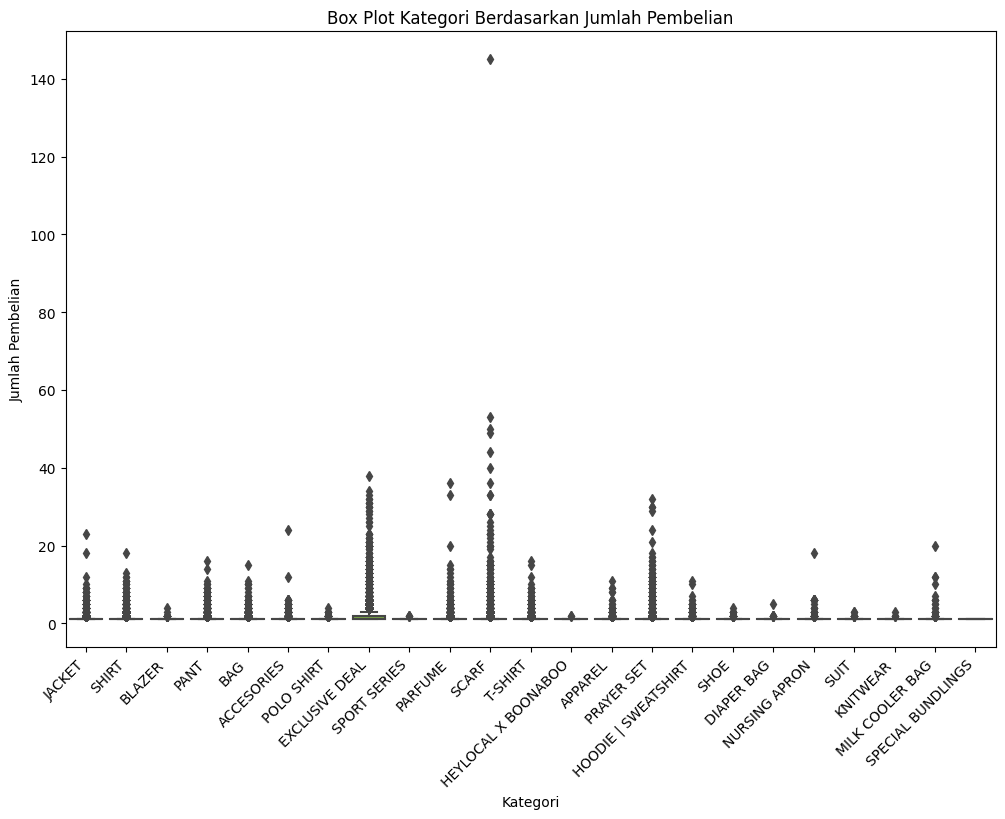

In [42]:
#@title Box Plot Kategori Berdasarkan Jumlah Pembelian
plt.figure(figsize=(12, 8))
sns.boxplot(x='kategori', y='qty', data=df)
plt.title('Box Plot Kategori Berdasarkan Jumlah Pembelian')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45, ha='right')
plt.show()

## Visualisasi berdasarkan status

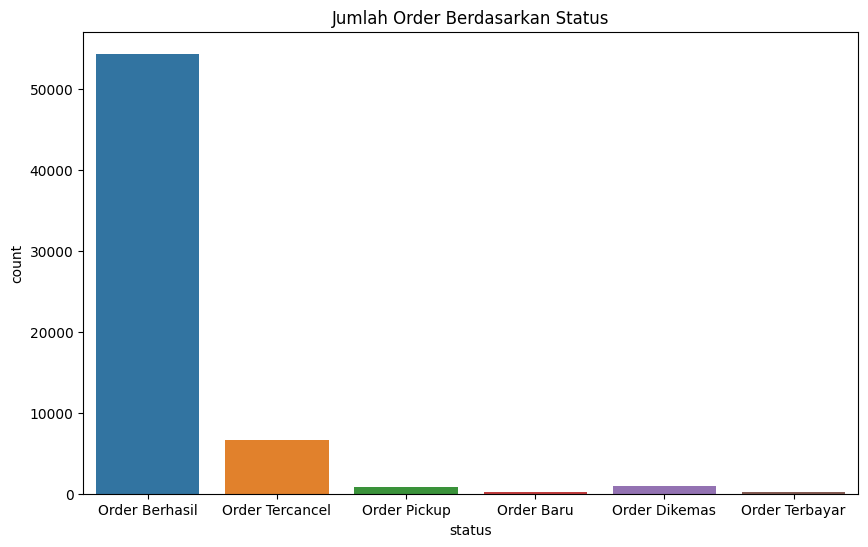

In [26]:
#@title Visualisasi Jumlah Order Berdasarkan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df)
plt.title('Jumlah Order Berdasarkan Status')
plt.show()

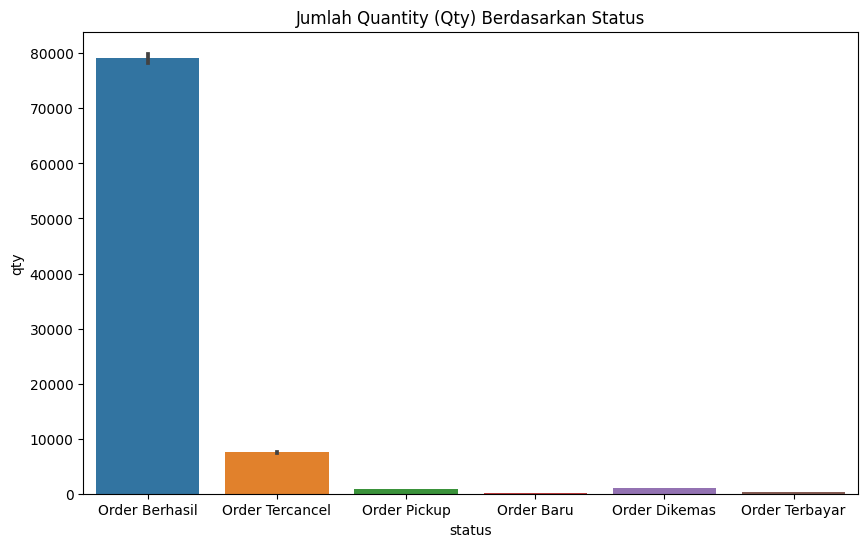

In [27]:
#@title Visualisasi jumlah qty berdasarkan status
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='qty', data=df, estimator=sum)
plt.title('Jumlah Quantity (Qty) Berdasarkan Status')
plt.show()

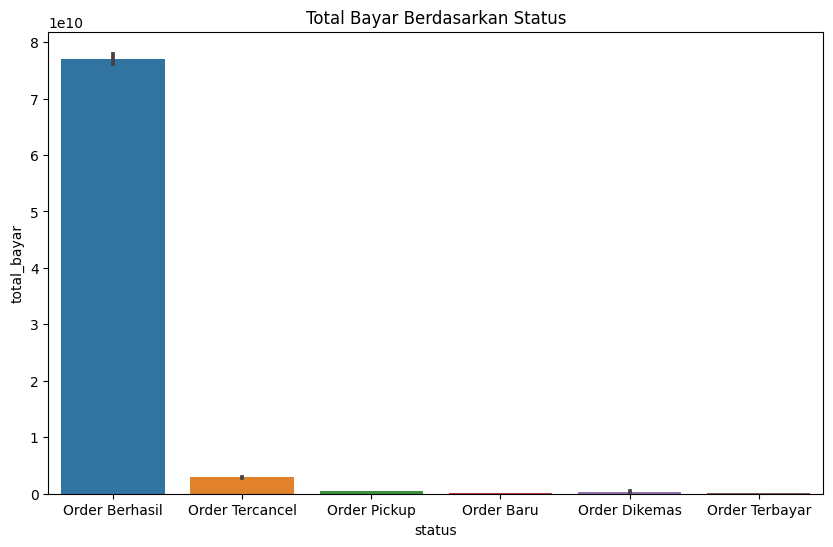

In [28]:
#@title Visualisasi total bayar berdasarkan status
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='total_bayar', data=df, estimator=sum)
plt.title('Total Bayar Berdasarkan Status')
plt.show()

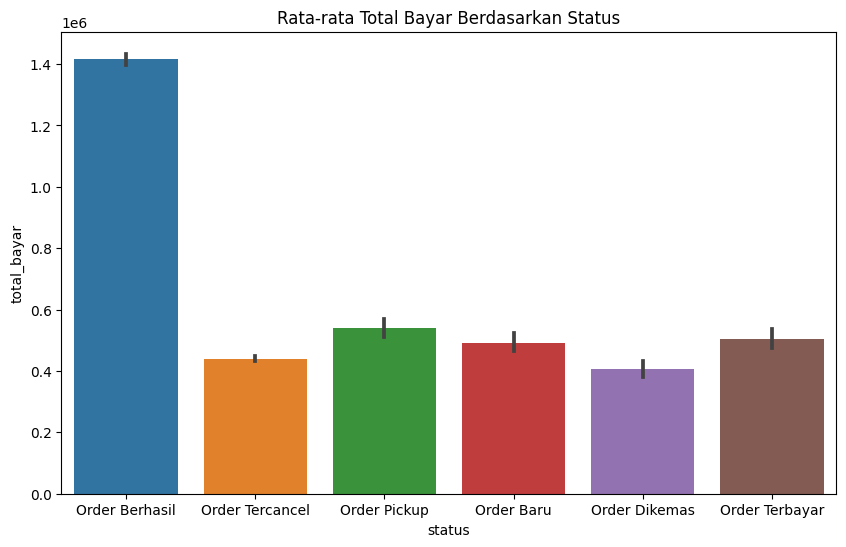

In [29]:
#@title Visualisasi rata-rata total bayar berdasarkan status
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='total_bayar', data=df, estimator='mean')
plt.title('Rata-rata Total Bayar Berdasarkan Status')
plt.show()

## Jumlah Order

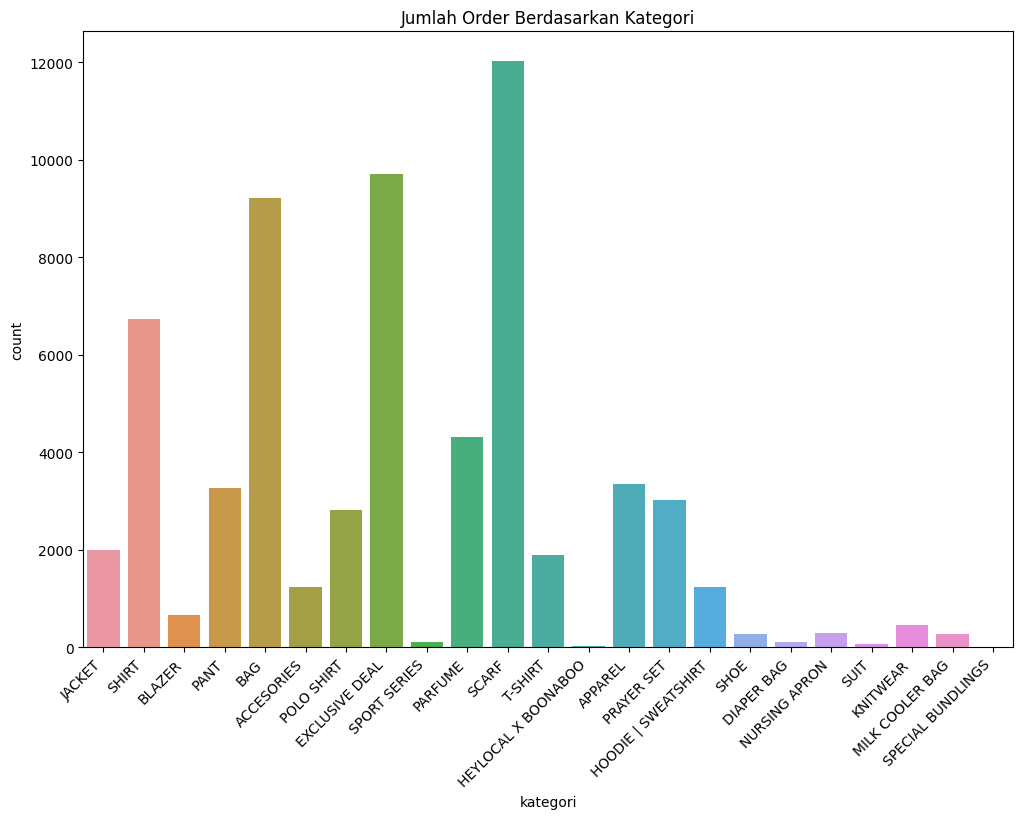

In [30]:
#@title Jumlah Order berdasarkan QTY
plt.figure(figsize=(12, 8))
sns.countplot(x='kategori', data=df)
plt.title('Jumlah Order Berdasarkan Kategori')
plt.xticks(rotation=45, ha='right')
plt.show()


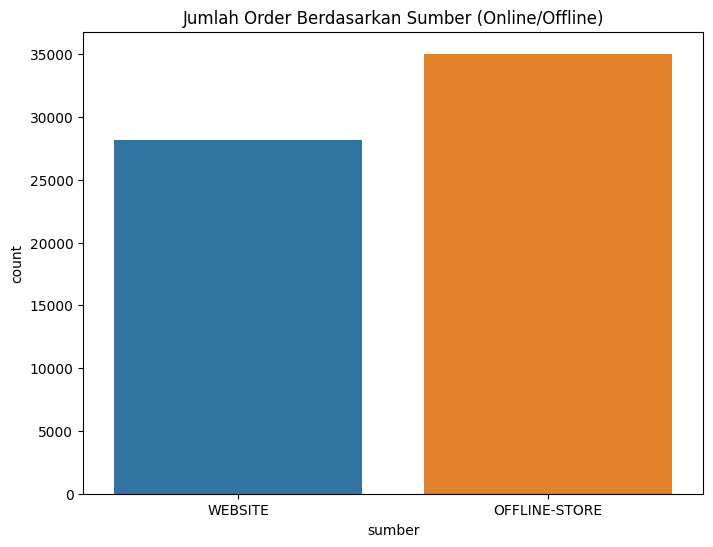

In [31]:
#@title Jumlah Order Berdasarkan Sumber (Online/Offline)
plt.figure(figsize=(8, 6))
sns.countplot(x='sumber', data=df)
plt.title('Jumlah Order Berdasarkan Sumber (Online/Offline)')
plt.show()

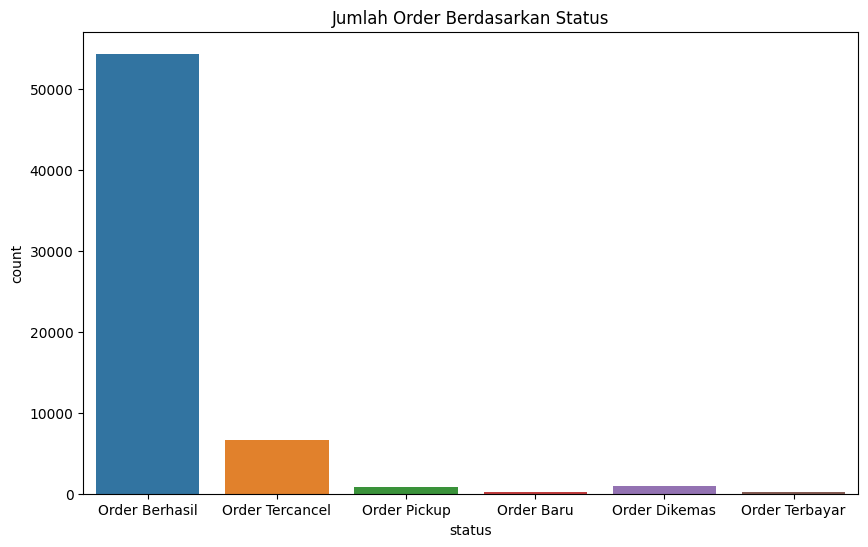

In [32]:
#@title Jumlah Order Berdasarkan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df)
plt.title('Jumlah Order Berdasarkan Status')
plt.show()

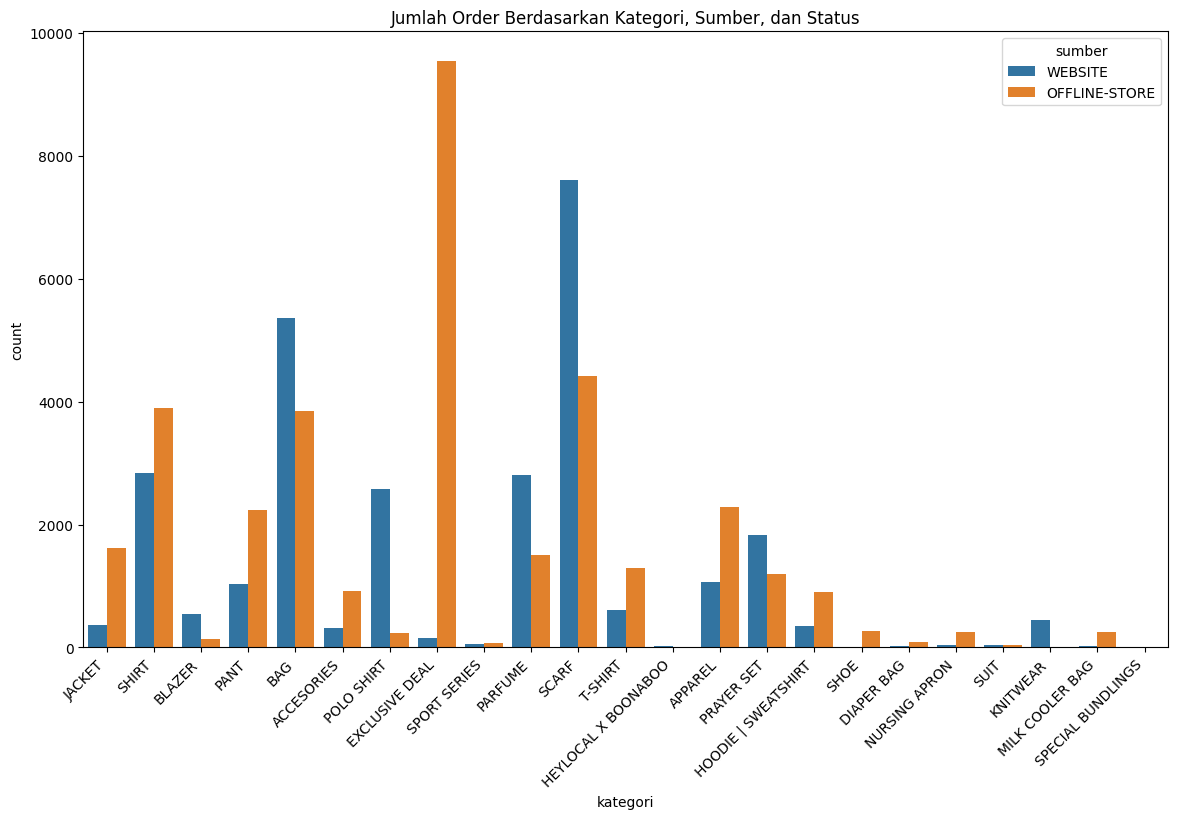

In [33]:
#@title Jumlah Order Berdasarkan Kategori, Sumber, dan Status
plt.figure(figsize=(14, 8))
sns.countplot(x='kategori', hue='sumber', data=df)
plt.title('Jumlah Order Berdasarkan Kategori, Sumber, dan Status')
plt.xticks(rotation=45, ha='right')
plt.show()

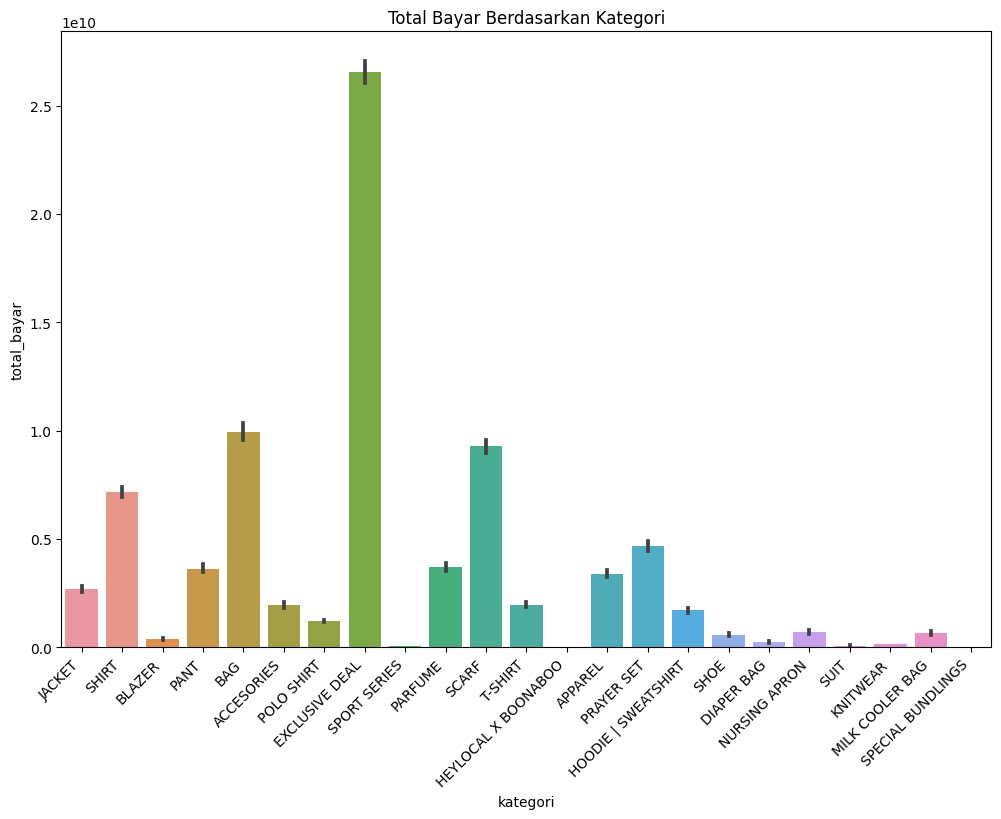

In [34]:
#@title Total Bayar Berdasarkan Kategori
plt.figure(figsize=(12, 8))
sns.barplot(x='kategori', y='total_bayar', data=df, estimator=sum)
plt.title('Total Bayar Berdasarkan Kategori')
plt.xticks(rotation=45, ha='right')
plt.show()

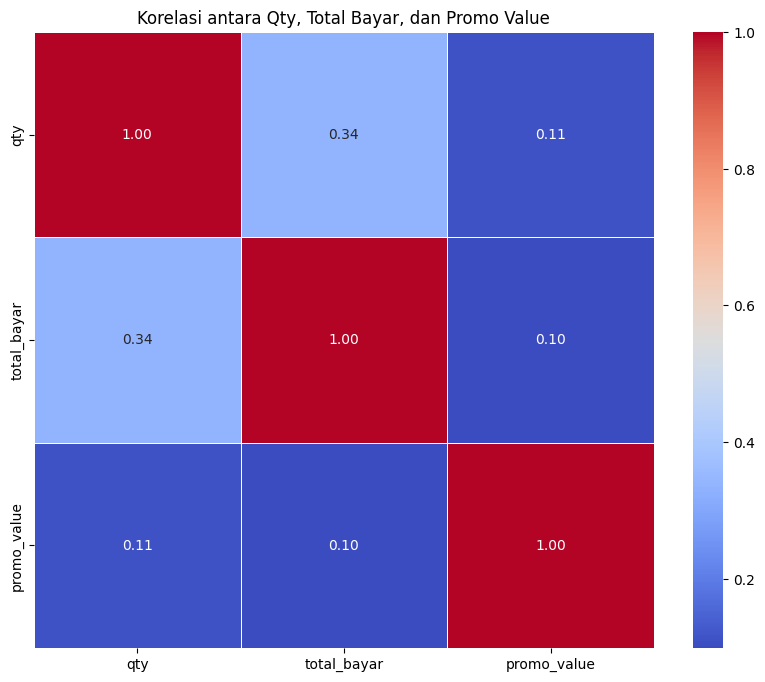

In [36]:
#melihat korelasi dari ketiga variabel dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['qty', 'total_bayar', 'promo_value']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Qty, Total Bayar, dan Promo Value')
plt.show()


In [50]:
cleaned_file_path = folder_path + 'final_cleaned2.csv'
#save data di folder yang sama
df.to_csv(cleaned_file_path, index=False)